In [1]:
%pylab inline
import numpy as np
import matplotlib.patches as patches

import sys 
sys.path.append('../core/')
from utils import *
from param_sweep import *
from sparse_reg import *

np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
m = 1001
T = 25
X, Y, A, X_true = get_lorenz_data(m=m, T=T, noise_percent=1, diff = 'Tik')
n = A.shape[1]

In [3]:
dim = 1 # y(t)
y = Y[:,dim].reshape(m,1)
x_true = X_true[:,dim].reshape(n,1)

In [4]:
normalize = True
X_foba,Tau_foba = Search_tau(A, y, FoBaGreedy, [100,5,5,False], normalize)
X_stls,Tau_stls = Search_tau(A, y, STRidge, 1e-5, normalize)

In [5]:
print('Number of parameters tested for FoBa:',len(Tau_foba))
print('Number of parameters tested for STLS:',len(Tau_stls))

Number of parameters tested for FoBa: 13
Number of parameters tested for STLS: 102


In [6]:
true_sparsity = (np.abs(x_true) > 0).astype(int)

sparsity_foba = np.hstack(np.abs(X_foba) > 0).astype(int)
sparsity_err_foba = np.sum(np.hstack([(np.abs(x) > 0).astype(int)+true_sparsity for x in X_foba])%2, axis = 0)

sparsity_stls = np.hstack(np.abs(X_stls) > 0).astype(int)
sparsity_err_stls = np.sum(np.hstack([(np.abs(x) > 0).astype(int)+true_sparsity for x in X_stls])%2, axis = 0)

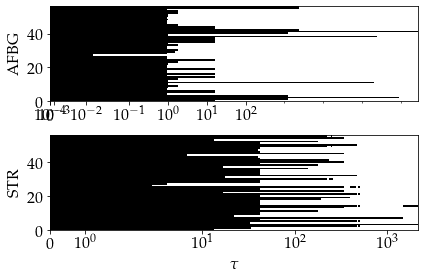

In [8]:
figure(figsize = (6,4))
label_fontsize = 16

##################################################################################################################

ax = subplot(211)
for j in range(len(Tau_foba)-1):
    if sparsity_err_foba[j] == 0:
        ax.add_patch(patches.Rectangle((Tau_foba[j],0),Tau_foba[j+1]-Tau_foba[j],n,
                                       linewidth=1,edgecolor='none',
                                       facecolor='b', alpha = 0.5))

Tau_mesh, N_mesh = np.meshgrid(Tau_foba, np.arange(n+1))
ax.pcolor(Tau_mesh, N_mesh, sparsity_foba[:,:-1], cmap = 'binary',shading='auto')
xscale('symlog', linthresh = Tau_foba[1])
xlim(Tau_foba[0], Tau_foba[-1])
ylim([0,n])
ylabel(r'AFBG', fontsize = label_fontsize)
xticks([0,1e-4,1e-3,1e-2,1e-1,1,10,100], fontsize = label_fontsize)
yticks(fontsize = label_fontsize)

##################################################################################################################

ax = subplot(212)
for j in range(len(Tau_stls)-1):
    if sparsity_err_stls[j] == 0:
        ax.add_patch(patches.Rectangle((Tau_stls[j],0),Tau_stls[j+1]-Tau_stls[j],n,
                                       linewidth=1,edgecolor='none',
                                       facecolor='b', alpha = 0.5))

Tau_mesh, N_mesh = np.meshgrid(Tau_stls, np.arange(n+1))
ax.pcolor(Tau_mesh, N_mesh, sparsity_stls[:,:-1], cmap = 'binary',shading='auto')
xscale('symlog', linthresh = Tau_stls[1])
xlim(Tau_stls[0], Tau_stls[-1])
ylim([0,n])

xlabel(r'$\tau$', fontsize = label_fontsize)
ylabel(r'STR', fontsize = label_fontsize)
xticks(fontsize = label_fontsize)
yticks(fontsize = label_fontsize)

tight_layout()

savefig('../figures/lorenz_y.png', dpi=800, transparent=True)